## 💚🤍🩷  Fashion_MNIST - spiegazione in <font color='blue'>italiano</font> 💚🤍🩷
### Descrizione (in italiano):
Questo notebook è scritto in italiano con l'obiettivo di rendere più accessibile l'analisi dei dati e il machine learning a coloro che parlano la nostra lingua, ma che potrebbero avere difficoltà a seguire contenuti in inglese. Ritengo importante supportare la comunità italofona con risorse nella propria lingua, per facilitare l'apprendimento e promuovere la partecipazione.<br>

Se sei un utente italiano o italofono in cerca di materiali nella tua lingua, spero che questo lavoro possa esserti utile!

### English summary:
This notebook is written in Italian to make data analysis and machine learning more accessible to Italian speakers who may find it difficult to follow content in English. The goal is to support the Italian-speaking community by providing resources in their native language, to ease learning and encourage participation.

If you're looking for Italian-language content, I hope this work helps!

### Import delle Librerie Rilevanti

In questa sezione, vengono importate le librerie fondamentali per questo progetto.<br>
Le librerie sono elencate in ordine di apparizione, con NumPy e Pandas che sono già state importate in precedenza.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image as Img
from IPython.display import Image, display

import warnings
warnings.filterwarnings("ignore")

# INTRODUZIONE
Fashion MNIST è una versione aggiornata del classico [MNIST](https://www.tensorflow.org/datasets/catalog/mnist?hl=it), ma invece di cifre scritte a mano, contiene immagini in scala di grigi di capi d'abbigliamento di 10 categorie diverse. È composto da 60,000 immagini per il training e 10,000 immagini per il test, con ciascuna immagine di dimensioni 28x28 pixel. Le categorie includono cose come scarpe, borse, magliette, vestiti, ecc.<br>
In questo notebook vi mostrerò come ho insegnato al mio computer a riconoscere i capi di abbigliamento. Vi guiderò attraverso il processo che ho utilizzato, condividendo anche alcuni trucchi su come esportare il modello per utilizzarlo su nuove immagini e su come visualizzare le immagini partendo dai numeri in cui sono state trasformate per essere elaborate dalla rete neurale.


## Loading dei dati
- Loading dei dati in formato Numpy ND-array
- Shape degli array per avere un'idea della dimensione dei dataset

In [2]:
raw_data = np.load("fashion-mnist_train.npy")
raw_test = np.load("fashion-mnist_test.npy")
print("Shape data: ", raw_data.shape)
print("Shape test: ", raw_test.shape)

Shape data:  (60000, 785)
Shape test:  (10000, 785)


**▶️Esegui il codice seguente per visualizzare alcune immagini campione dal dataset *Fashion MNIST* e farti un'idea di come sono fatte le immagini che lo compongono.**<br>
<font color='red'>Attenzione!</font> Otterrai un output diverso ogni volta che eseguirai il codice.

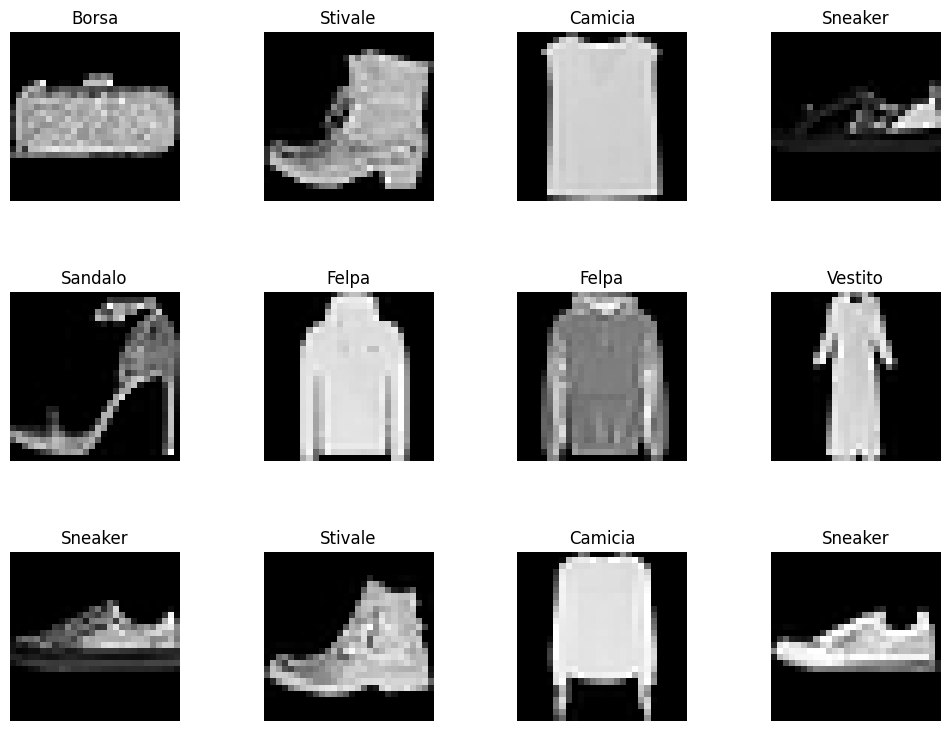

In [26]:
input_image = raw_data[:,1:]
target_image = raw_data[:,0]

reshaped_input = input_image.reshape(-1, 28, 28)

df = pd.Series(target_image)
labels = df.map({
    0: 'T-shirt/Top', 
    1: 'Pantaloni', 
    2: 'Felpa', 
    3: 'Vestito', 
    4: 'Cappotto', 
    5: 'Sandalo', 
    6: 'Camicia', 
    7: 'Sneaker',
    8: 'Borsa',
    9: 'Stivale'})

fig, axs = plt.subplots(3, 4, figsize=(12, 9))  # crea una griglia 4x3 (12 immagini in totale)
fig.subplots_adjust(hspace=0.5, wspace=0.5)     # regola lo spazio tra le immagini

N = len(reshaped_input)  # numero totale di immagini disponibili

# genera 12 indici casuali unici per selezionare le immagini
random_indices = np.random.choice(N, size=12, replace=False)

# loop per visualizzare le immagini
for i in range(3):                                        # itera sulle righe
    for j in range(4):                                    # itera sulle colonne
        n = random_indices[i * 4 + j]                     # calcola l'indice dell'immagine
        axs[i, j].imshow(reshaped_input[n], cmap='gray')  # visualizza l'immagine in grigio
        axs[i, j].set_title(labels[n])                    # imposta il titolo con l'etichetta
        axs[i, j].axis('off')                             # nasconde gli assi

plt.show()

### Visualizzazione del dataset
Fatto convertendo Numpy array in Pandas DataFrame, per essere "umanamente" leggibile (cioè visualizzato in modo che possa essere compreso dalle nostre menti limitate).

In [4]:
columns = ['Label'] + [str(i) for i in range(1, 785)]
data_df = pd.DataFrame(raw_data, columns=columns)
data_df

,Label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,162.0,163.0,135.0,94.0,0.0,0.0,0.0,0.0,0.0
59998,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nel DataFrame precedente, la prima colonna (**Label**) rappresenta la classe a cui appartiene ciascuna immagine.<br>
Il dataset [fashion-mnist](https://github.com/zalandoresearch/fashion-mnist) contiene decine di migliaia di immagini di capi d'abbigliamento, ciascuna classificata con un numero da 0 a 9.

**▶️Esegui il codice seguente per visualizzare una tabella con le classi (Label) del dataset Fashion MNIST e i rispettivi capi d'abbigliamento a cui ciascuna classe corrisponde.**

In [5]:
classi = pd.Series(['T-shirt/Top', 'Pantaloni', 'Felpa', 'Vestito', 'Cappotto','Sandalo', 'Camicia', 'Sneaker', 'Borsa', 'Stivale'])
classi

0    T-shirt/Top
1      Pantaloni
2          Felpa
3        Vestito
4       Cappotto
5        Sandalo
6        Camicia
7        Sneaker
8          Borsa
9        Stivale
dtype: object

Le immagini, in scala di grigi, sono in formato 28x28 pixel, per un totale di 784 pixel. I valori di ciascun pixel, compresi tra 0 e 255, sono distribuiti nelle colonne da 1 a 784. In questo dataset, i capi di abbigliamento sono rappresentati con tonalità più chiare su uno sfondo nero o molto scuro, un'inversione rispetto a una rappresentazione tradizionale in bianco e nero.

**▶️Esegui il codice seguente per vedere come le immagini del dataset Fashion MNIST vengono rappresentate numericamente, con ogni pixel identificato da un valore che indica l'intensità del grigio.**<br>
Il codice visualizza un’immagine campione del dataset *Fashion MNIST* mostrandola come una griglia di valori in scala di grigi, in cui ogni pixel ha un’intensità numerica annotata sopra. In questo modo è più facile capire la rappresentazione dei pixel che verrà utilizzata come input per il modello.

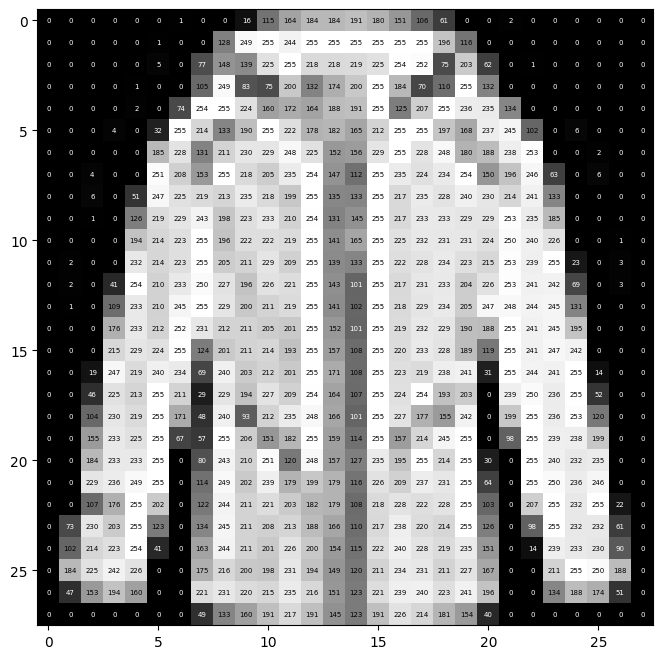

In [27]:
def visualize_input(img, ax):       
    ax.imshow(img, cmap='gray')  
    height, width = img.shape
    
    thresh = img.max()/2.5 # serve a decidere il colore del testo annotato sopra i pixel
    for x in range(height):
        for y in range(width):
            ax.annotate(str(int(img[x][y])), xy=(y,x),
                        fontsize=5,
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')
            
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

visualize_input(reshaped_input[12989], ax) # modifica l'indice di reshaped_input per vedere altre immagini
plt.show()

## Suddivisione dei dati in Train e Validation Set

In questa sezione, suddividiamo il dataset in due parti: il **train set**, utilizzato per addestrare il modello, e il **validation set**, utilizzato per valutare le prestazioni del modello su dati che non ha mai visto prima. Questa suddivisione è fondamentale per garantire che il modello non solo impari dalle immagini, ma sia anche in grado di generalizzare su dati nuovi e sconosciuti.

**▶️Per verificare se i dati sono distribuiti in maniera uniforme tra le diverse classi, utilizziamo il seguente codice.** <br>
Il primo comando restituisce le classi uniche presenti nella colonna 'Label', mentre il secondo calcola la media delle classi nella colonna.

In [7]:
print(np.unique(raw_data[:,0]))
print(np.mean(raw_data[:,0]))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
4.5


Dal calcolo della media delle classi, che risulta essere 4.5, possiamo dedurre che le classi siano equamente rappresentate nel dataset. In pratica, ogni capo d'abbigliamento è ugualmente rappresentato nel dataset. Tuttavia, per essere certi che i dati siano mescolati correttamente e non presentino un ordine sequenziale, eseguiremo comunque uno **shuffling** del dataset prima di procedere con l'addestramento.


## Shuffling dei dati
Faremo uno shuffling dei dati per garantire che siano mescolati in modo casuale prima dell'addestramento.<br>
Nota che lo shuffling cambia a ogni esecuzione, il che potrebbe influenzare i risultati di ogni run.

Per fare lo shuffling del dataset, dobbiamo seguire questi passaggi:
1. Creare un array di indici che vanno da 0 al numero totale di righe del dataset. Ad esempio, se il dataset ha 10,000 righe, l'array conterrà valori da 0 a 9,999.
2. Mescolare casualmente l'array di indici. Dopo questo passaggio, gli indici saranno disposti in ordine casuale.
3. Utilizzare l'array di indici mescolati per riordinare il dataset. In questo modo, le righe del dataset originale vengono rimescolate in modo casuale.

**▶️Esegui il codice seguente per fare lo shuffling del dataset.**

In [8]:
shuffled_indices = np.arange(raw_data.shape[0]) # crea un array contenente tutti gli indici del dataset
np.random.shuffle(shuffled_indices)             # mescola casualmente gli indici
shuffled_data = raw_data[shuffled_indices]      # riordina il dataset in base agli indici mescolati

## Separazione degli input dai target
Nella fase di preparazione dei dati, è fondamentale separare gli input (features) dal target (Label) prima di procedere all'addestramento del modello. Questo passaggio è cruciale per garantire che il modello apprenda a fare previsioni sui dati in modo accurato e indipendente.<br><br>
Gli **input** rappresentano le caratteristiche delle immagini (ad esempio, i pixel dell'immagine in formato 28x28) che utilizzeremo per addestrare il modello.<br><br>
Il **target**, d'altra parte, sono le etichette corrispondenti, che indicano a quale classe appartiene ogni immagine (nel caso del dataset fashion MNIST, le classi vanno da 0 a 9).

**▶️Esegui il codice seguente per separare il target dall'input.**

In [9]:
data_target = shuffled_data[:,0] # estrae la prima colonna ('Label')
data_input = shuffled_data[:,1:] # estraeil resto delle colonne (da 1 a 784)

In [10]:
# facciamo la stessa cosa anche con il dataset di test
test_target = raw_test[:,0]
test_input = raw_test[:,1:]

## Separazione Training e Validation set
La separazione del dataset in **training set** e **validation set** è fondamentale per valutare le prestazioni del modello su dati non visti e per prevenire il problema dell'overfitting. Una proporzione comune per questa suddivisione è 80/20 o 70/30, ma può variare in base alla dimensione e alla natura del dataset.<br><br>
Nel mio caso, ho scelto uno split di 90/10. Dato che il dataset è molto grande, con 60.000 righe, questa scelta mi consente di utilizzare una parte significativa dei dati per l'addestramento, garantendo al contempo un numero sufficiente di esempi per la validazione.

**▶️Esegui il codice seguente per separare il validation set dal train set.**

In [11]:
samples_count = shuffled_data.shape[0]

train_samples_count = int(0.9*samples_count)
validation_samples_count = int(0.1*samples_count)

train_input = data_input[:train_samples_count]
train_target = data_target[:train_samples_count]

val_input = data_input[train_samples_count:train_samples_count+validation_samples_count]
val_target = data_target[train_samples_count:train_samples_count+validation_samples_count]

## Scaling dei dati
Lo scaling dei dati è un passaggio importante nell'addestramento del modello: normalizzare i valori dei pixel, portandoli in un range tra 0 e 1, rende infatti i dati più omogenei e agevola il modello nella fase di apprendimento. Questa trasformazione aiuta il modello a convergere più rapidamente e migliora la stabilità numerica durante l’addestramento.

**▶️Esegui il codice seguente per fare lo scaling dei dati.**

In [12]:
# con questo codice, tutti i nostri dati saranno normalizzati in un range compreso tra 0 e 1
scaled_input = (train_input / 255).round(3)
scaled_val = (val_input / 255).round(3) 
scaled_test = (test_input / 255).round(3)

# MODELLO

## Definizione del Modello
In questa sezione, definiamo l'architettura della rete neurale che andremo ad addestrare per riconoscere i capi d'abbigliamento. Partiremo dalla scelta del numero di strati, neuroni e funzioni di attivazione, e procederemo fino alla configurazione finale del modello.<br><br>
Il modello utilizzato è una rete neurale sequenziale composta da **tre strati nascosti** (**hidden layer**), ognuno con **<font color=#009933>50 neuroni</font>**, e uno **strato di output** con **<font color='red'>10 neuroni</font>**, uno per ciascuna **classe** nel dataset *Fashion MNIST*. La **funzione di attivazione <font color=#990033>ReLU</font>** è utilizzata nei livelli nascosti per introdurre non-linearità e migliorare la capacità del modello di apprendere pattern complessi, mentre la **<font color=#990033>softmax</font>** è applicata all’output per generare una distribuzione di probabilità sulle 10 classi.

**▶️Esegui il codice seguente per definire l'architettura della rete neurale.**

In [13]:
input_size = 784          # dimensione dell'input (28x28 pixel flattenati)
output_size = 10          # numero di classi di output
hidden_layer_size = 50    # numero di neuroni negli strati nascosti

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
                          ])

## Configurazione del Modello
Questo codice configura il modello specificando l’**ottimizzatore** (*optimizer*), la **funzione di perdita** (*loss*) e le **metriche** di valutazione (*metrics*).<br><br>
Come ottimizzatore, usiamo **Adam** (Adaptive Moment Estimation), che aggiorna i **pesi** delle connessioni tra i neuroni durante l'addestramento per minimizzare l'**errore** tra le previsioni del modello e i valori corretti. Ad ogni passo, l’ottimizzatore fa piccoli aggiustamenti ai pesi per migliorare la precisione del modello.<br><br>
Per la funzione di perdita, usiamo **sparse categorical crossentropy**, che misura quanto il modello si discosta dalle risposte corrette. Ogni volta che il modello fa una previsione, la funzione calcola l'**errore** confrontando la previsione con il valore corretto.<br>
**<font color ='blue'>Un valore di perdita più alto indica un errore maggiore, e l'obiettivo del modello durante l'addestramento è ridurre al minimo questa perdita.</font>** L'ottimizzatore utilizza il valore di perdita per decidere come cambiare i pesi del modello.<br><br>
Infine, come metrica usiamo l'**accuratezza**, che misura la percentuale di previsioni corrette, indicandoci quante volte il modello ha previsto correttamente il risultato rispetto al totale. Le metriche non influenzano l'addestramento, ma forniscono informazioni utili per il monitoraggio dei progressi.

**▶️Esegui il codice seguente per configurare il modello.**

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Addestramento del Modello
Ora che abbiamo definito l'architettura e configurato il nostro modello, siamo pronti per addestrarlo! Prima di procedere, però, introduciamo una **funzione di callback** chiamata *early stopping*. Questa funzione ha il compito di interrompere l'addestramento nel caso in cui non si registrino più miglioramenti significativi nelle prestazioni del modello. Questa strategia è fondamentale per ottimizzare l'uso delle risorse di calcolo e prevenire l'**overfitting**, cioè il fenomeno in cui il modello impara troppo bene i dati di addestramento, perdendo la capacità di generalizzare su dati nuovi e mai visti..

**▶️Esegui il codice seguente per addestrare il modello.**

In [15]:
# definizione del callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,                 # numero di epoch da attendere senza miglioramenti
    restore_best_weights=True    # ripristina i pesi del modello migliori
)

# addestramento del modello
history = model.fit(
    scaled_input,                              # input del modello (dati di addestramento)
    train_target,                              # output da associare (target)
    batch_size=100,                            # dimensione del batch di dati da elaborare in un singolo passaggio
    epochs=100,                                # numero massimo di iterazioni per l'addestramento
    callbacks=[early_stopping],                # interrompe l'addestramento in caso di mancati miglioramenti
    validation_data=(scaled_val, val_target),  # input e output di validazione per monitorare le prestazioni durante l'addestramento
    verbose=2
)

Epoch 1/100
540/540 - 9s - loss: 0.6204 - accuracy: 0.7846 - val_loss: 0.4645 - val_accuracy: 0.8283
Epoch 2/100
540/540 - 9s - loss: 0.4219 - accuracy: 0.8516 - val_loss: 0.4027 - val_accuracy: 0.8548
Epoch 3/100
540/540 - 15s - loss: 0.3847 - accuracy: 0.8624 - val_loss: 0.3773 - val_accuracy: 0.8630
Epoch 4/100
540/540 - 9s - loss: 0.3599 - accuracy: 0.8706 - val_loss: 0.3646 - val_accuracy: 0.8687
Epoch 5/100
540/540 - 7s - loss: 0.3401 - accuracy: 0.8766 - val_loss: 0.3455 - val_accuracy: 0.8730
Epoch 6/100
540/540 - 7s - loss: 0.3211 - accuracy: 0.8834 - val_loss: 0.3274 - val_accuracy: 0.8808
Epoch 7/100
540/540 - 7s - loss: 0.3104 - accuracy: 0.8877 - val_loss: 0.3262 - val_accuracy: 0.8820
Epoch 8/100
540/540 - 7s - loss: 0.3030 - accuracy: 0.8882 - val_loss: 0.3550 - val_accuracy: 0.8678
Epoch 9/100
540/540 - 9s - loss: 0.2912 - accuracy: 0.8936 - val_loss: 0.3382 - val_accuracy: 0.8773
Epoch 10/100
540/540 - 9s - loss: 0.2819 - accuracy: 0.8955 - val_loss: 0.3472 - val_accur

## Test del Modello
Dopo aver addestrato il modello, dobbiamo testarlo per verificarne le prestazioni su dati mai visti prima. A tal fine, utilizzeremo il dataset di test che abbiamo preparato in precedenza. Il codice restituirà il valore della **loss function** raggiunto e l'**accuratezza percentuale** ottenuta.

**▶️Esegui il codice seguente per misurare il valore della loss e l'accuratezza.**

In [16]:
test_loss, test_accuracy = model.evaluate(scaled_test, test_target)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'. format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 5ms/step - loss: 0.3088 - accuracy: 0.8906
Test loss: 0.31. Test accuracy: 89.06%


### Grafico della Loss Function
A titolo esemplificativo, mostriamo il grafico che illustra l'**andamento della loss function** durante le diverse iterazioni di addestramento (*epoch*).<br>
Il grafico confronta la perdita (**loss**) del *training set* con quella del *validation set*. Man mano che l'addestramento procede, si osserva una diminuzione della *loss*. Tuttavia, può capitare che la *validation loss* (**val_loss**) aumenti; in questo caso, la funzione di **early stopping** interviene per interrompere l'addestramento, poiché non si registrano più miglioramenti significativi.

**▶️Esegui il codice seguente per visualizzare il grafico della Loss Function.**

<Axes: xlabel='Epoch', ylabel='Loss'>

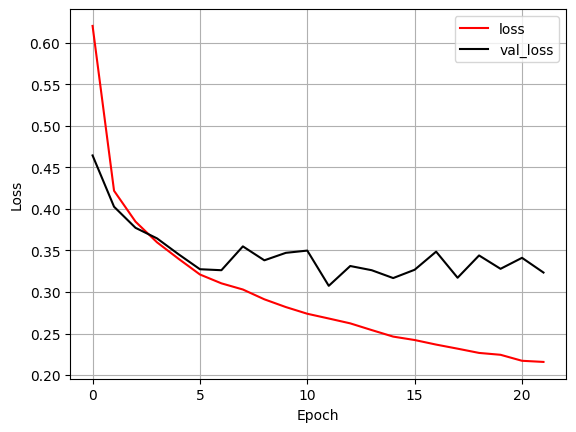

In [17]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(legend=True, grid= True, xlabel='Epoch', ylabel='Loss', colormap='flag')

In [18]:
print('______________________________\n')
print('Test accuracy: {:.2f}%'.format(test_accuracy*100))
print("Minimum validation loss: {}".format(history_df['val_loss'].min().round(2)))
print('______________________________')

______________________________

Test accuracy: 89.06%
Minimum validation loss: 0.31
______________________________


# Mettiamo alla prova il nostro modello: riconosciamo i vestiti!
In questa parte potrai caricare varie immagini di vestiti raccolte da internet. Per semplicità, le immagini sono già in formato quadrato; tuttavia, non sono in bianco e nero e non hanno le dimensioni di 28x28 pixel. In questa sezione, passo dopo passo, l'immagine verrà pre-processata per poi essere sottoposta alla rete neurale, così potrai vedere quanto è brava a classificare i vestiti. Ti avverto: riconosce abbastanza bene borse e pantaloni, ma non se la cava proprio con le scarpe. Sapresti addestrare un modello migliore?


## Scegli l'immagine
Qui puoi scegliere una serie di immagini da processare e poi sottoporre alla rete neurale.<br> Per caricare un'immagine, ti basterà semplicemente cambiare il nome del file.<br> Prova con queste immagini: *bag*, *coat*, *dress*, *pullover*, *t-shirt*.

**▶️Esegui il codice seguente per scegliere l'immagine.**

Anteprima Immagine:


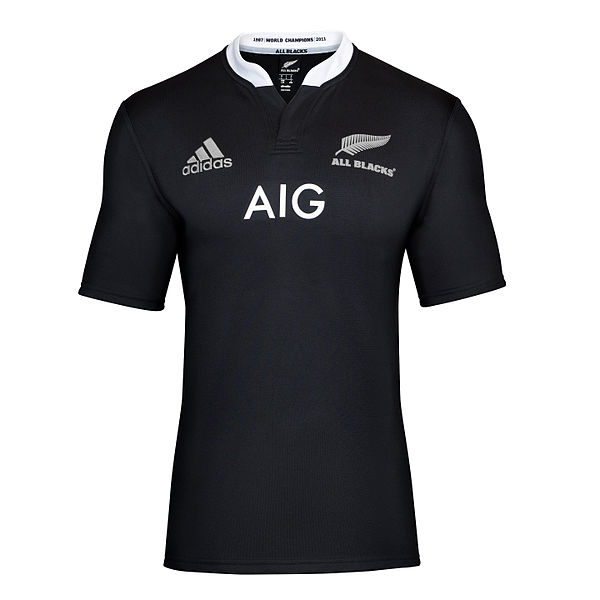

In [20]:
sample = 't-shirt'             # inserisci qui il nome dell'immagine: 'bag', 'coat', 'dress', 'pullover', 't-shirt'
file_name = f'{sample}.jpg'
print('Anteprima Immagine:')
display(Image(filename=f'{file_name}'))

## Processamento dell'immagine
Il processamento dell'immagine prevede tre passaggi:
- **conversione** dell'immagine in scala di grigi a 8 bit
- **inversione** dei valori dei pixel, affinché i vestiti appaiano chiari su uno sfondo scuro
- **ridimensionamento** a 28x28 pixel

**▶️Esegui il codice seguente per processare l'immagine.**

In [21]:
# apre l'immagine dal percorso specificato
img_path = f'{file_name}'
img = Img.open(img_path)

# converte l'immagine in scala di grigio
gray_img = img.convert('L')  # 'L' significa "luminanza", rappresenta una scala di grigio a 8 bit

# inverte il valore dei pixel
inverted_img = Img.eval(gray_img, lambda x: 255 - x)

# ridimensiona l'immagine a 28x28 pixel
resized_img = inverted_img.resize((28, 28))

**▶️Esegui il codice seguente per visualizzare le trasformazioni dell'immagine.**

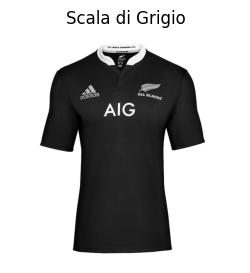

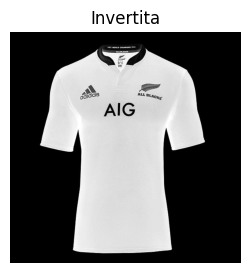

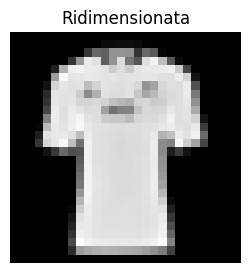

In [22]:
# funzione di visualizzazione dell'immagine
def display_image(image, title=""):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')  # nasconde gli assi
    plt.show()

# visualizza le immagini
display_image(gray_img, title="Scala di Grigio")
display_image(inverted_img, title="Invertita")
display_image(resized_img, title="Ridimensionata")

### Conversione dell'immagine
Per sottoporre l'immagine alla rete neurale, dobbiamo convertire i suoi pixel in valori numerici e ordinarli sotto forma di un array di dimensione 1x784. Poiché il modello è stato addestrato con batch di 100 immagini alla volta, si aspetta un array bidimensionale (N, M). Tuttavia, la nostra immagine sarà monodimensionale (, M), quindi dobbiamo aggiungere una dimensione extra.

**▶️Esegui il codice seguente per convertire l'immagine in array.**

In [23]:
# conversione dell'immagine in un array numpy per ottenere i valori dei pixel
pixel_values = np.array(resized_img)
pixel_values_flattened = pixel_values.reshape(-1,28,28)  # appiattimento dell'immagine in un array di dimensione 784 (28x28) 
image_flattened = pixel_values.reshape(-1)               # restituisce un array di dimensione 784

# viene aggiunta una dimensione per il batch, perché il nostro modello si aspetta un batch di immagini
image_flattened_batch = image_flattened.reshape(1, -1)

## Fai una previsione!
Ora che l'immagine è stata correttamente processata e convertita in valori numerici, possiamo sottoporla al modello per vedere come viene classificata. In altre parole, possiamo valutare quanto sia efficace la nostra rete neurale nel classificare correttamente l'input.

**▶️Esegui il codice seguente per fare una previsione.**

In [24]:
class_labels = classi.tolist()
predictions = model.predict(image_flattened_batch)
probabilities = predictions[0]
label_probabilities = {label: f'{prob * 100:.0f}%' for label, prob in zip(class_labels, probabilities)}
sorted_label_probabilities = dict(sorted(label_probabilities.items(), key=lambda item: item[1], reverse=True))

for label, prob in sorted_label_probabilities.items():
    print(f'{label}: {prob}')

T-shirt/Top: 100%
Pantaloni: 0%
Felpa: 0%
Vestito: 0%
Cappotto: 0%
Sandalo: 0%
Camicia: 0%
Sneaker: 0%
Borsa: 0%
Stivale: 0%


## Confronta la tua previsione con il mio modello precedentemente addestrato
In questa sezione, ho caricato un modello che ho precedentemente addestrato. Puoi utilizzarlo per confrontare la tua previsione con quella del mio modello. <br>
<font color='red'>**Attenzione: potresti ottenere un risultato totalmente diverso dal modello attuale!**

**▶️Esegui il codice seguente per caricare e sottoporre l'immagine al mio modello.**

In [25]:
model_loaded = tf.keras.models.load_model('image_recognition.h5')
predictions = model_loaded.predict(image_flattened_batch)

for label, prob in sorted_label_probabilities.items():
    print(f'{label}: {prob}')

T-shirt/Top: 100%
Pantaloni: 0%
Felpa: 0%
Vestito: 0%
Cappotto: 0%
Sandalo: 0%
Camicia: 0%
Sneaker: 0%
Borsa: 0%
Stivale: 0%
